In [1]:

import os
import math
import pickle
from argparse import ArgumentParser
import random
import logging

import xgboost
import pandas as pd
import numpy as np
path = "/Users/hadleyvanrenterghem/Documents/CloudC/cloud-project-fall2020/flux/ml/results/xgboost_KMeans"

In [2]:
clf = xgboost.XGBRegressor(
            n_estimators=50,
            objective="reg:linear",
            booster="gbtree",
            max_depth=10,
            base_score=2,
            importance_type="gain", # For feature importance
            random_state=1 # Not set in original code
            )

In [60]:
import seaborn as sns
import pylab

vars = np.array(["time", "previous_flow_time", "agg_net_out", "agg_net_in", "agg_net_out_per_machine", "agg_net_in_per_machine", "tcp_queue", "machine", "cpu", "ram", "disk_write", "memory_read", "memory_write", "first_call", "flow_size","flow_frequency"]);
colorDict = {} 
cm = pylab.get_cmap('nipy_spectral')
for i in range(len(vars)):
    colorDict[vars[i]] = cm(1.*i/15)  # color will now be an RGBA tuple
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [61]:
print(colorDict["time"])
print(len(col))

(0.0, 0.0, 0.0, 1.0)
16


In [69]:
#get feature names
import numpy as np
col = np.array(["time", "previous_flow_time", "agg_net_out", "agg_net_in", "agg_net_out_per_machine", "agg_net_in_per_machine", "tcp_queue", "machine", "cpu", "ram", "disk_write", "memory_read", "memory_write", "first_call", "flow_size"])
cols = np.empty((0,))
for i in range(4,0,-1):
    flow = "_" + str(i)
    flowInfo = np.char.add(col, flow)
    cols = np.concatenate((cols, flowInfo), axis=None)
#last one does not include flow size
flow = "_" + str(0)
flowInfo = np.char.add(col[0:-1], flow)
cols = np.concatenate((cols, flowInfo), axis=None)



In [70]:
print(cols)

['time_4' 'previous_flow_time_4' 'agg_net_out_4' 'agg_net_in_4'
 'agg_net_out_per_machine_4' 'agg_net_in_per_machine_4' 'tcp_queue_4'
 'machine_4' 'cpu_4' 'ram_4' 'disk_write_4' 'memory_read_4'
 'memory_write_4' 'first_call_4' 'flow_size_4' 'time_3'
 'previous_flow_time_3' 'agg_net_out_3' 'agg_net_in_3'
 'agg_net_out_per_machine_3' 'agg_net_in_per_machine_3' 'tcp_queue_3'
 'machine_3' 'cpu_3' 'ram_3' 'disk_write_3' 'memory_read_3'
 'memory_write_3' 'first_call_3' 'flow_size_3' 'time_2'
 'previous_flow_time_2' 'agg_net_out_2' 'agg_net_in_2'
 'agg_net_out_per_machine_2' 'agg_net_in_per_machine_2' 'tcp_queue_2'
 'machine_2' 'cpu_2' 'ram_2' 'disk_write_2' 'memory_read_2'
 'memory_write_2' 'first_call_2' 'flow_size_2' 'time_1'
 'previous_flow_time_1' 'agg_net_out_1' 'agg_net_in_1'
 'agg_net_out_per_machine_1' 'agg_net_in_per_machine_1' 'tcp_queue_1'
 'machine_1' 'cpu_1' 'ram_1' 'disk_write_1' 'memory_read_1'
 'memory_write_1' 'first_call_1' 'flow_size_1' 'time_0'
 'previous_flow_time_0' 'ag

[01:16:17] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

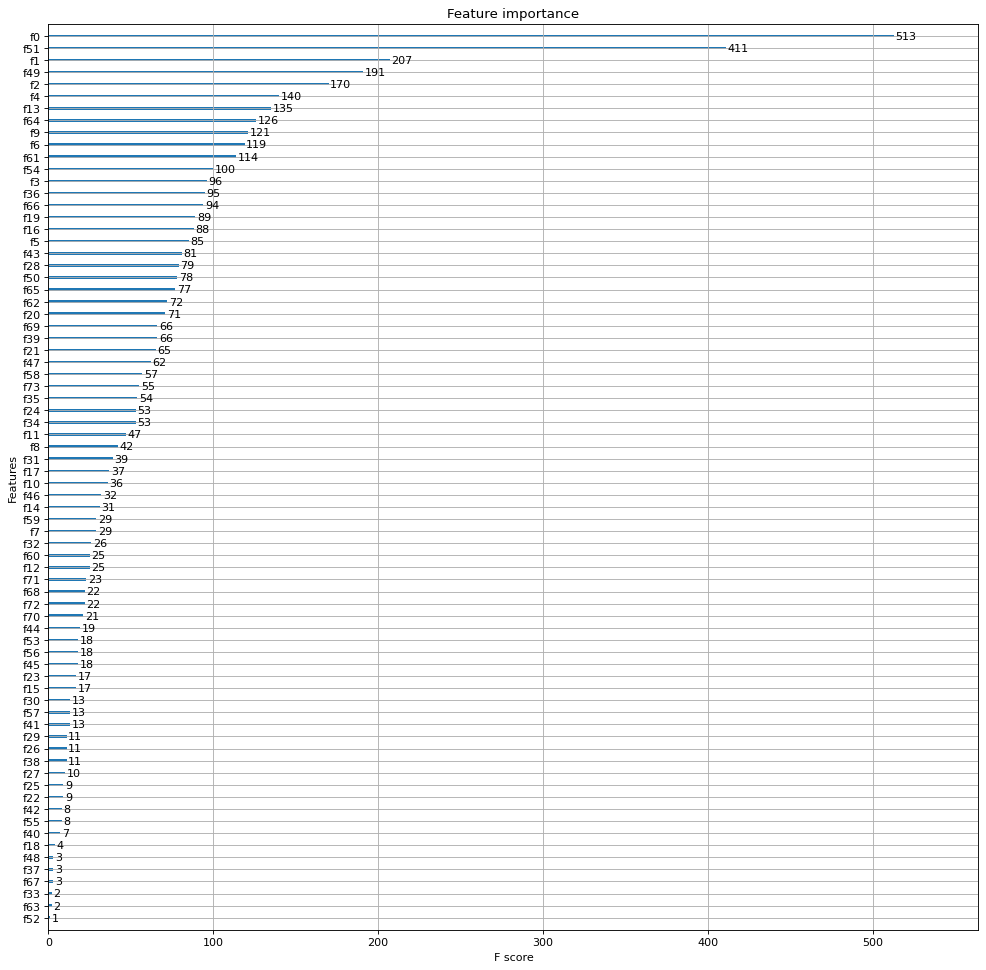

In [71]:
clf.load_model(path)
import matplotlib.pyplot as plt
fig = plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
xgboost.plot_importance(clf, ax=ax)

In [72]:
scores = clf.get_booster().get_score(importance_type='gain')
print(len(scores))


74


In [73]:
feature_importance = np.empty((len(scores),1))
for feature_num in range(0,74):
    feature_name = cols[feature_num]
    feature_key = "f" + str(feature_num)
    feature_importance[feature_num] = scores[feature_key]

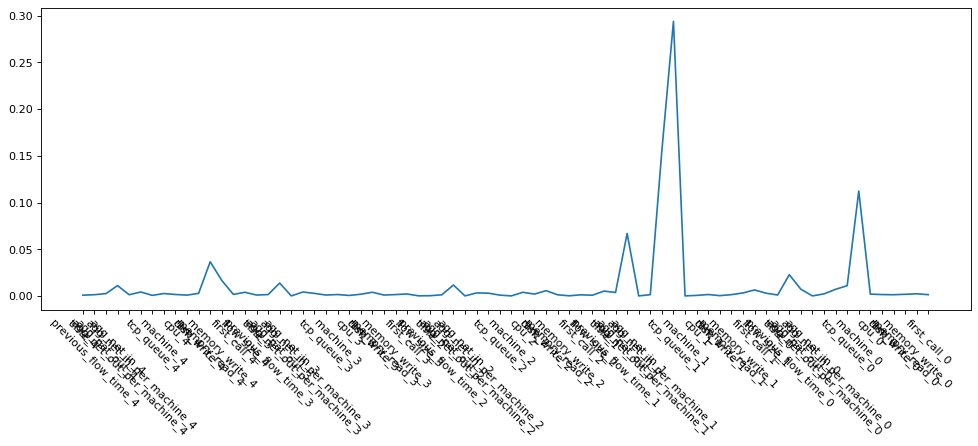

In [74]:
fig = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k');
plt.plot(cols, feature_importance);
plt.xticks(rotation=-45);

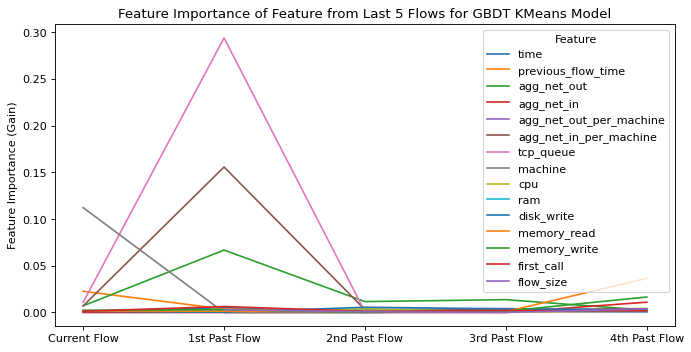

In [75]:
fig = plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
feature_sums = np.empty((15,))
for feature in range(0,15):
    name = cols[feature]
    values = feature_importance[feature::15]
    feature_sums[feature] = np.sum(values)
    names = cols[feature::15]
    inds = 4 - np.arange(0, len(values))
    plt.plot(inds,values, label=name[0:-2])
    plt.legend()
    plt.title('Feature Importance of Feature from Last 5 Flows for GBDT KMeans Model')
plt.xticks(np.arange(0,5), ['Current Flow', '1st Past Flow', '2nd Past Flow', '3rd Past Flow', '4th Past Flow'])  # Set text labels.
plt.ylabel('Feature Importance (Gain)')
plt.legend(title = "Feature")


Text(0.5, 1.0, '%Contributions KMeans Model')

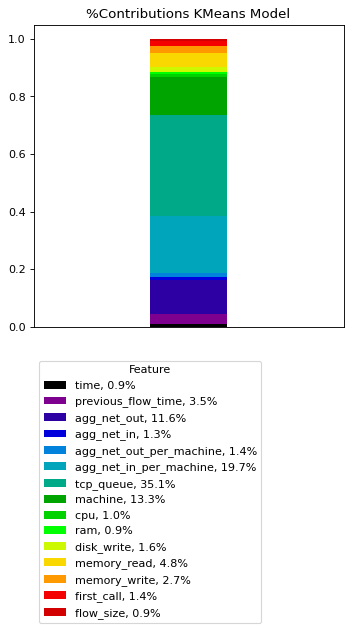

In [76]:
fig = plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
feature_sum = feature_sums/np.sum(feature_sums)

barWidth = .5
cumSum = 0
for i in range(len(feature_sum)):  
    # Create green Bars
    name = col[i]
    plt.bar(0, feature_sum[i], bottom = cumSum, color = colorDict[name], width=barWidth, label = name + ", " + str(round(feature_sum[i]*100 ,1))+"%")
    plt.xlim(-1,1)
    cumSum = cumSum + feature_sum[i]
plt.legend(loc='lower left',bbox_to_anchor=(0, -1, 1, 0.5),title = "Feature")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title("%Contributions KMeans Model")
# orange Bars

In [30]:
fig = plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
flow_sum = np.empty((5,))
flow_sum[4] = np.sum(feature_importance[0:15])
flow_sum[3] = np.sum(feature_importance[15:30])
flow_sum[2] = np.sum(feature_importance[30:45])
flow_sum[1] = np.sum(feature_importance[45:60])
flow_sum[0] = np.sum(feature_importance[60:75])
flow_sum = flow_sum/np.sum(flow_sum)
barWidth = .5
cumSum = 0
for i in range(len(flow_sum)):  
    # Create green Bars
    plt.bar(0, flow_sum[i], bottom = cumSum,width=barWidth, label = "flow " + str(i)+ ", " + str(round(flow_sum[i]*100 ,1))+"%")
    plt.xlim(-1,1)
    cumSum = cumSum + flow_sum[i]
plt.legend(loc='lower left',bbox_to_anchor=(0, -.4, 1, 0.5),title = "Flows in Past")

ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.title("%Contributions KMeans Model")
# orange Bars
# orange Bars

KeyError: 'flow_size_4'

<Figure size 400x400 with 0 Axes>

In [18]:
#double check feature names
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/hadleyvanrenterghem/Documents/CloudC/cloud-project-fall2020/flux/ml')
import xgboost_util


In [19]:
TRAINING_PATH = "/Users/hadleyvanrenterghem/Documents/CloudC/ml/KMeans/training"    
training_files = [os.path.join(TRAINING_PATH, f) for f in os.listdir(TRAINING_PATH)]

scaling = xgboost_util.calculate_scaling(training_files)
data = xgboost_util.prepare_files(training_files, 5, scaling)
inputs, outputs = xgboost_util.make_io(data)


In [20]:
print(cols)
print(data)
#yes these appear to be in same order

['time_4' 'previous_flow_time_4' 'agg_net_out_4' 'agg_net_in_4'
 'agg_net_out_per_machine_4' 'agg_net_in_per_machine_4' 'tcp_queue_4'
 'machine_4' 'cpu_4' 'ram_4' 'disk_write_4' 'memory_read_4'
 'memory_write_4' 'first_call_4' 'flow_size_4' 'time_3'
 'previous_flow_time_3' 'agg_net_out_3' 'agg_net_in_3'
 'agg_net_out_per_machine_3' 'agg_net_in_per_machine_3' 'tcp_queue_3'
 'machine_3' 'cpu_3' 'ram_3' 'disk_write_3' 'memory_read_3'
 'memory_write_3' 'first_call_3' 'flow_size_3' 'time_2'
 'previous_flow_time_2' 'agg_net_out_2' 'agg_net_in_2'
 'agg_net_out_per_machine_2' 'agg_net_in_per_machine_2' 'tcp_queue_2'
 'machine_2' 'cpu_2' 'ram_2' 'disk_write_2' 'memory_read_2'
 'memory_write_2' 'first_call_2' 'flow_size_2' 'time_1'
 'previous_flow_time_1' 'agg_net_out_1' 'agg_net_in_1'
 'agg_net_out_per_machine_1' 'agg_net_in_per_machine_1' 'tcp_queue_1'
 'machine_1' 'cpu_1' 'ram_1' 'disk_write_1' 'memory_read_1'
 'memory_write_1' 'first_call_1' 'flow_size_1' 'time_0'
 'previous_flow_time_0' 'ag

In [140]:
print(inputs.shape)

(515473, 44)
